In [1]:
# Following https://elitedatascience.com/keras-tutorial-deep-learning-in-python
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import matplotlib.pyplot as plt

from keras.datasets import mnist
%matplotlib inline
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


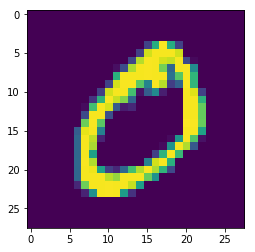

In [2]:
plt.imshow(X_train[1])

[5 0 4 1 9 2 1 3 1 4]


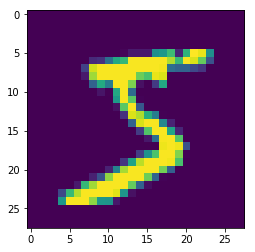

In [3]:
X_train.shape
print(y_train[:10])
plt.imshow(X_train[0])

# Reshaping image data
## Preprocessing image data

In [4]:
# we want to transform our dataset from having shape (n, width, height) to (n, width, height, depth).
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
# Convert dataset type to float32 and normalize range [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
# Turn y_train and y_test into 10 distinct classes
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train.shape

(60000, 10)

# Constructing a model

## 1. CNN input layer

In [11]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28, 28, 1)))
# input_shape=(28, 28, 1) corresponds to width 28 height 28 and depth 1
# first 3 param ->
# 1. Number of convolutional filters
# 2. Number of rows in each convolution kernel

/Users/jasons/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [12]:
model.output_shape

(None, 26, 26, 32)

In [13]:
model.add(Conv2D(32, 3, 3))
# max pooling is a way to reduce number of parameters by sliding in a 2x2 pooling filters
# 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter.
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout prevents overfitting
model.add(Dropout(0.25))

/Users/jasons/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


# 2. Fully connected Dense layer

In [14]:
# Final layer has to be flattened to 1 dimensional before passing it down to the FC
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Final layer has output size of 10, which corresponds to number of classes
model.add(Dense(10, activation='softmax'))

# 3. Compile the model

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 4. Train the model

In [24]:
from keras.models import model_from_json
try:
    json_file = open('mnist/model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    # load weights into new model
    model.load_weights("mnist/model.h5")
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    print('Loaded model from the files')
except Exception as e:
    print(e)
    model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
    # Once training is done, save the model to the file system
    # serialize model to JSON
    model_json = model.to_json()
    with open("mnist/model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("mnist/model.h5")
    print("Saved model to the disk")

Loaded model from the files


# 5. Saving the model to json and its weights

# 6. Evaluating the model

In [26]:
score = model.evaluate(X_test, Y_test, verbose=0)

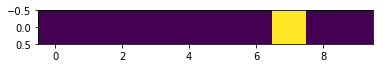

In [29]:
test_img = X_test[0].reshape(1, 28, 28, 1)
result = model.predict(test_img)
plt.imshow(result)